Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction (5).csv
First 5 rows:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      

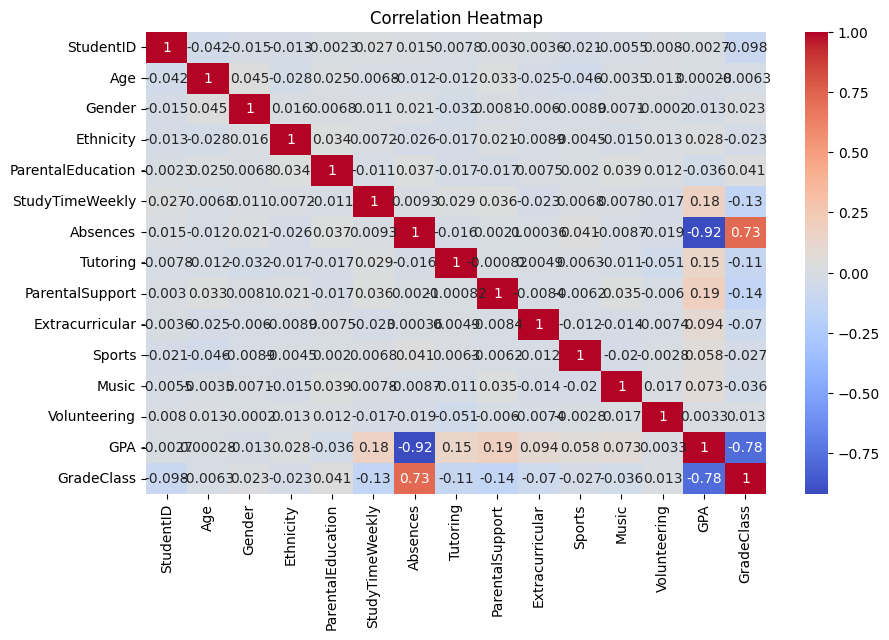


Model Evaluation:
MAE: 0.13169102296450938
MSE: 0.22688183716075158
RMSE: 0.4763211491848242
R2 Score: 0.848153562802637


In [9]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Load the dataset
import pandas as pd

# Use the exact file name from the upload
df = pd.read_csv('8. Student Performance Prediction.csv')

# Step 3: Preview the dataset
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Basic EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target (assumes last column is the target, adjust if needed)
print("\nColumn Names:", df.columns)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Preprocess data
# Automatically detect categorical variables
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Assuming the target is the last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 6: Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R2 Score:", r2_score(y_test, y_pred))
